In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/logos"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 9 directories and 0 images in '/content/drive/MyDrive/logos'.
There are 0 directories and 5786 images in '/content/drive/MyDrive/logos/Ford'.
There are 0 directories and 5575 images in '/content/drive/MyDrive/logos/Honday'.
There are 0 directories and 7020 images in '/content/drive/MyDrive/logos/Nissan'.
There are 0 directories and 6599 images in '/content/drive/MyDrive/logos/Renault'.
There are 0 directories and 6603 images in '/content/drive/MyDrive/logos/Suzuki'.
There are 0 directories and 6865 images in '/content/drive/MyDrive/logos/Tata'.
There are 0 directories and 6905 images in '/content/drive/MyDrive/logos/Toyota'.
There are 0 directories and 6905 images in '/content/drive/MyDrive/logos/Volkswagen'.
There are 10 directories and 0 images in '/content/drive/MyDrive/logos/train'.
There are 1 directories and 442 images in '/content/drive/MyDrive/logos/train/Ford'.
There are 0 directories and 221 images in '/content/drive/MyDrive/logos/train/Ford/augmented'.
There are 1 

In [ ]:
data_dir='/content/drive/MyDrive/logos'

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4102 files belonging to 9 classes.
Using 3282 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4102 files belonging to 9 classes.
Using 820 files for validation.


In [ ]:
class_names = val_ds.class_names
print(class_names)

['Ford', 'Honday', 'Hyundai', 'Nissan', 'Renault', 'Suzuki', 'Tata', 'Toyota', 'Volkswagen']


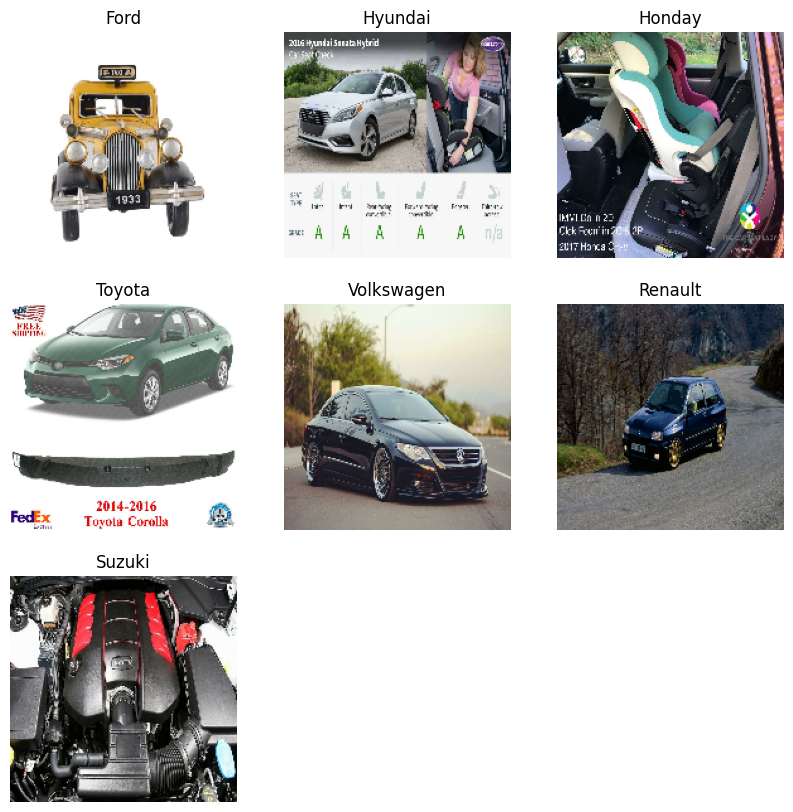

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(7):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#RESNET50 MODEL

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(9, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_5 (ModuleWr  (None, 9)                 4617      
 apper)                                                          
                                                                 
Total params: 24641417 (94.00 MB)
Trainable params: 1053705 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=20

history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
103/103 [==============================] - 469s 5s/step - loss: 2.2114 - accuracy: 0.2602 - val_loss: 1.8294 - val_accuracy: 0.3244
Epoch 2/20
103/103 [==============================] - 362s 4s/step - loss: 1.6553 - accuracy: 0.4065 - val_loss: 1.8381 - val_accuracy: 0.3183
Epoch 3/20
103/103 [==============================] - 359s 3s/step - loss: 1.3815 - accuracy: 0.5152 - val_loss: 1.8285 - val_accuracy: 0.3573
Epoch 4/20
103/103 [==============================] - 358s 3s/step - loss: 1.1870 - accuracy: 0.5887 - val_loss: 1.8660 - val_accuracy: 0.3805
Epoch 5/20
103/103 [==============================] - 359s 3s/step - loss: 0.9877 - accuracy: 0.6597 - val_loss: 1.8242 - val_accuracy: 0.3939
Epoch 6/20
103/103 [==============================] - 360s 3s/step - loss: 0.8301 - accuracy: 0.7221 - val_loss: 1.9820 - val_accuracy: 0.3866
Epoch 7/20
103/103 [==============================] - 363s 4s/step - loss: 0.6778 - accuracy: 0.7782 - val_loss: 1.9827 - val_accuracy: 0.3927

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/photos/Toyota/frontfacingToyotacar10.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 101ms/step
[[4.7170039e-02 4.9754940e-02 4.1558193e-03 1.8609251e-03 5.4873503e-04
  1.8466327e-03 1.6724088e-06 8.9115483e-01 3.5064390e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Toyota


#VGG16 MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
import tensorflow as tf

In [ ]:
vgg_model = Sequential()
pretrained_model = VGG16(include_top=False,
                         input_shape=(180, 180, 3),
                         pooling='avg',
                         weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(9, activation='softmax'))
vgg_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14981961 (57.15 MB)
Trainable params: 267273 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
vgg_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10

history = vgg_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
103/103 [==============================] - 1076s 10s/step - loss: 0.2603 - accuracy: 0.9464 - val_loss: 2.7855 - val_accuracy: 0.3817
Epoch 2/10
103/103 [==============================] - 1075s 10s/step - loss: 0.2573 - accuracy: 0.9473 - val_loss: 2.8081 - val_accuracy: 0.3976
Epoch 3/10
103/103 [==============================] - 1085s 11s/step - loss: 0.2163 - accuracy: 0.9592 - val_loss: 2.9180 - val_accuracy: 0.3817
Epoch 4/10
103/103 [==============================] - 1077s 10s/step - loss: 0.1998 - accuracy: 0.9650 - val_loss: 3.0146 - val_accuracy: 0.3866
Epoch 5/10
103/103 [==============================] - 1009s 10s/step - loss: 0.2028 - accuracy: 0.9637 - val_loss: 3.0823 - val_accuracy: 0.3732
Epoch 6/10
103/103 [==============================] - 1005s 10s/step - loss: 0.1821 - accuracy: 0.9686 - val_loss: 3.0615 - val_accuracy: 0.4024
Epoch 7/10
103/103 [==============================] - 1006s 10s/step - loss: 0.1650 - accuracy: 0.9707 - val_loss: 3.0362 - val_ac

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/photos/Toyota/frontfacingToyotacar10.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


In [ ]:
pred=vgg_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)